## 实现混淆矩阵，精准率和召回率

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [3]:
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\software\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9755555555555555

In [6]:
y_log_predict = log_reg.predict(X_test)

In [7]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)

403

In [8]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

FP(y_test, y_log_predict)

2

In [9]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

FN(y_test, y_log_predict)

9

In [10]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

TP(y_test, y_log_predict)

36

In [11]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_test, y_predict), FP(y_test, y_predict)],
        [FN(y_test, y_predict), TP(y_test, y_predict)]
    ])

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [12]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    
precision_score(y_test, y_log_predict)

0.9473684210526315

In [13]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
    
recall_score(y_test, y_log_predict)

0.8

### scikit-learn中的混淆矩阵，精准率和召回率

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [15]:
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [16]:
precision_score(y_test, y_log_predict)

0.9473684210526315

In [17]:
recall_score(y_test, y_log_predict)

0.8

### F1 Score

In [18]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [19]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [20]:
precision = 0.5
recall = 0.6
f1_score(precision, recall)

0.5454545454545454

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\software\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9755555555555555

In [22]:
y_predict = log_reg.predict(X_test)

In [23]:
confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [24]:
precision_score(y_test, y_predict)

0.9473684210526315

In [25]:
recall_score(y_test, y_predict)

0.8

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.8674698795180723

### 准确率和召回率平衡

In [27]:
log_reg.decision_function(X_test)

array([-21.39854362, -32.89732861, -16.41806543, -79.82324711,
       -48.03301319, -24.1825065 , -44.61001539, -24.24470013,
        -1.14286376, -19.00460513, -65.82299987, -50.9707066 ,
       -30.92073612, -45.94866867, -37.36152112, -29.51341023,
       -36.92851844, -82.80981004, -37.63662308,  -9.87876314,
        -9.26812633, -85.25163727, -16.75034146, -45.34427689,
        -5.02565026, -48.29807287, -11.65878414, -37.36063122,
       -25.08299722, -13.59761546, -16.59531872, -28.7859973 ,
       -34.36790583, -28.52336238,  -8.11461317,  -4.60241698,
       -21.94218483, -21.87785805, -31.17528817, -23.36482534,
       -26.90558935, -62.23613637, -37.6869895 , -66.36558822,
       -20.10369518, -16.68540499, -18.16732516, -21.54926747,
       -28.96548357, -19.61414667,   2.41254155,   7.72933988,
       -34.87166204, -42.70949406, -25.632425  , -34.75120137,
        -7.59780389, -49.51341444, -51.52646985,  19.66207067,
       -10.09740962, -32.00616175, -11.4993307 ,  -1.42

In [28]:
log_reg.decision_function(X_test)[:10]

array([-21.39854362, -32.89732861, -16.41806543, -79.82324711,
       -48.03301319, -24.1825065 , -44.61001539, -24.24470013,
        -1.14286376, -19.00460513])

In [29]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
decision_scores = log_reg.decision_function(X_test)

In [31]:
 np.min(decision_scores)

-85.72834819853409

In [32]:
np.max(decision_scores)

19.899135882295568

In [33]:
y_predict_2 = np.array(decision_scores >= 5,  dtype="int")
print(confusion_matrix(y_test, y_predict_2))
print(precision_score(y_test, y_predict_2))
print(recall_score(y_test, y_predict_2))

[[404   1]
 [ 21  24]]
0.96
0.5333333333333333


In [34]:
y_predict_3 = np.array(decision_scores >= -5,  dtype="int")
print(confusion_matrix(y_test, y_predict_3))
print(precision_score(y_test, y_predict_3))
print(recall_score(y_test, y_predict_3))

[[390  15]
 [  5  40]]
0.7272727272727273
0.8888888888888888


In [35]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype="int")
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

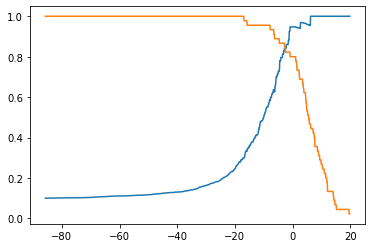

In [36]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### precision-recall曲线

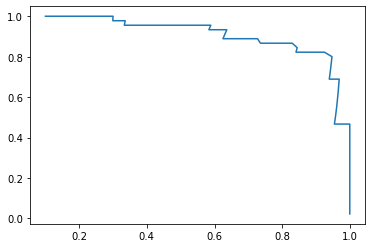

In [37]:
plt.plot(precisions, recalls)
plt.show()

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [39]:
precisions.shape

(151,)

In [40]:
recalls.shape

(151,)

In [41]:
thresholds.shape

(150,)

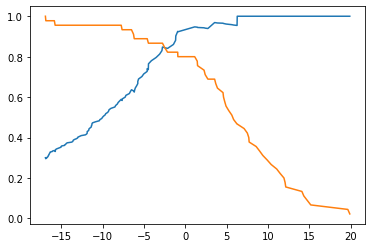

In [42]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

### ROC曲线

In [43]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

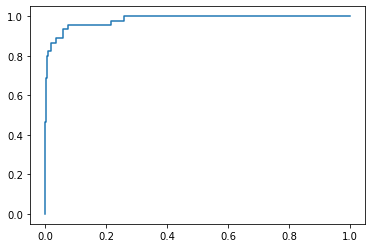

In [44]:
plt.plot(fprs, tprs)
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9823868312757201